<a href="https://colab.research.google.com/github/gabrielalastra/HR_Analytics/blob/main/lookingforPatterns_plus_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielalastra/HR_Analytics/main/company_x_dataset_HR.csv')

In [169]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


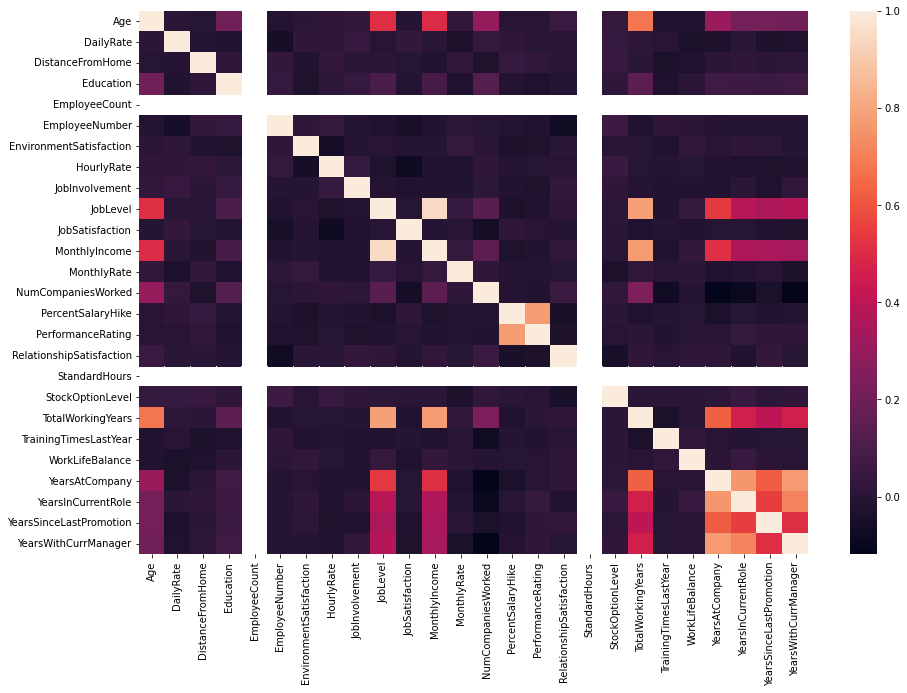

In [4]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr())

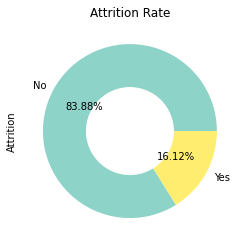

In [91]:
df['Attrition'].value_counts().plot(kind='pie',
                                     colormap='Set3', autopct='%.2f%%')
plt.title('Attrition Rate')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [6]:
maskAt = df['Attrition'] == 'Yes'
maskAt = df[maskAt]
maskAt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


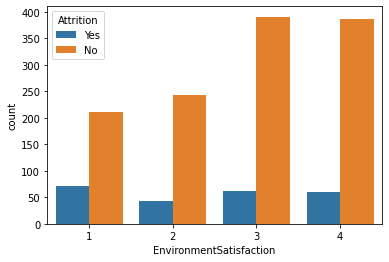

In [168]:
sns.countplot(x='EnvironmentSatisfaction', data=df, hue='Attrition')

Text(0.5, 0, 'Employee Count')

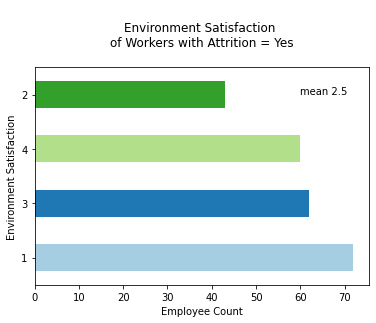

In [86]:
maskAt['EnvironmentSatisfaction'].value_counts().plot(kind='barh',
                                                      color=plt.cm.Paired(np.arange(len(maskAt['EnvironmentSatisfaction']))),
                                                      label='Environment Satisfaction')
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean {:.1f}'.format(maskAt['EnvironmentSatisfaction'].mean()),
             xy=(60,3))
plt.title('\nEnvironment Satisfaction \nof Workers with Attrition = Yes\n')
plt.ylabel('Environment Satisfaction')
plt.xlabel('Employee Count')


In [96]:
maskAt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 1461
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       237 non-null    int64 
 1   Attrition                 237 non-null    object
 2   BusinessTravel            237 non-null    object
 3   DailyRate                 237 non-null    int64 
 4   Department                237 non-null    object
 5   DistanceFromHome          237 non-null    int64 
 6   Education                 237 non-null    int64 
 7   EducationField            237 non-null    object
 8   EmployeeCount             237 non-null    int64 
 9   EmployeeNumber            237 non-null    int64 
 10  EnvironmentSatisfaction   237 non-null    int64 
 11  Gender                    237 non-null    object
 12  HourlyRate                237 non-null    int64 
 13  JobInvolvement            237 non-null    int64 
 14  JobLevel                 

Text(0.5, 0, 'Employee Count')

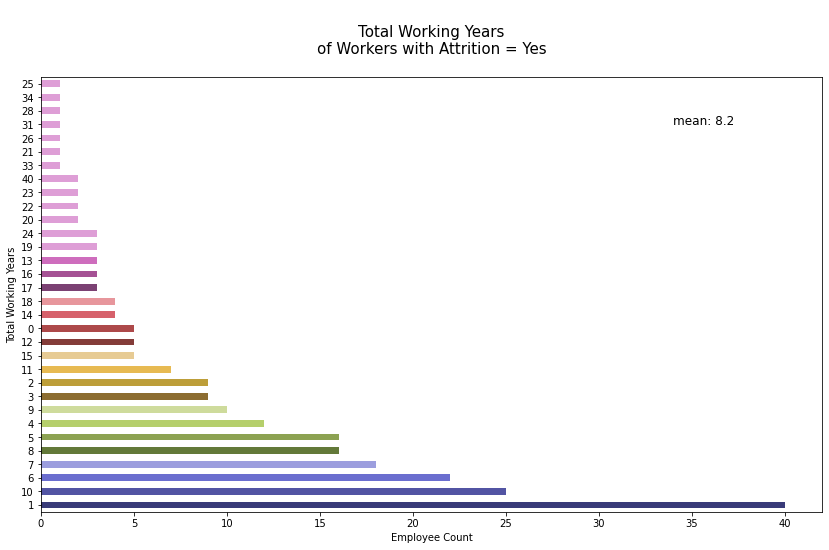

In [120]:
plt.figure(figsize=[14,8])
maskAt['TotalWorkingYears'].value_counts().plot(kind='barh',
                                                      color=plt.cm.tab20b(np.arange(len(maskAt['TotalWorkingYears']))),
                                                      label='Total Working Years')
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['TotalWorkingYears'].mean()),
             xy=(34,28), size=12)
plt.title('\nTotal Working Years\nof Workers with Attrition = Yes\n', size=15)
plt.ylabel('Total Working Years')
plt.xlabel('Employee Count')

Text(0.5, 0, 'Employee Count')

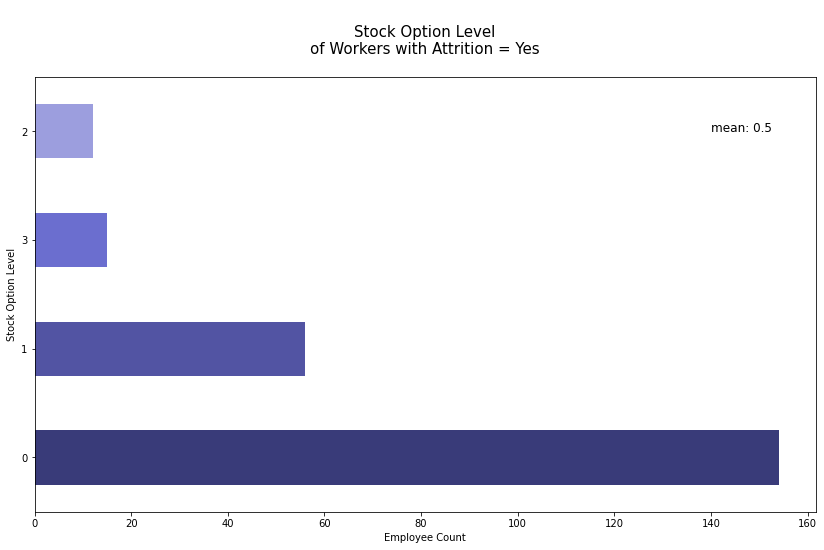

In [201]:
plt.figure(figsize=[14,8])
maskAt['StockOptionLevel'].value_counts().plot(kind='barh',
                                                      color=plt.cm.tab20b(np.arange(len(maskAt['StockOptionLevel']))))
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['StockOptionLevel'].mean()),
             xy=(140,3), size=12)
plt.title('\nStock Option Level\nof Workers with Attrition = Yes\n', size=15)
plt.ylabel('Stock Option Level')
plt.xlabel('Employee Count')

Text(0.5, 0, 'Employee Count')

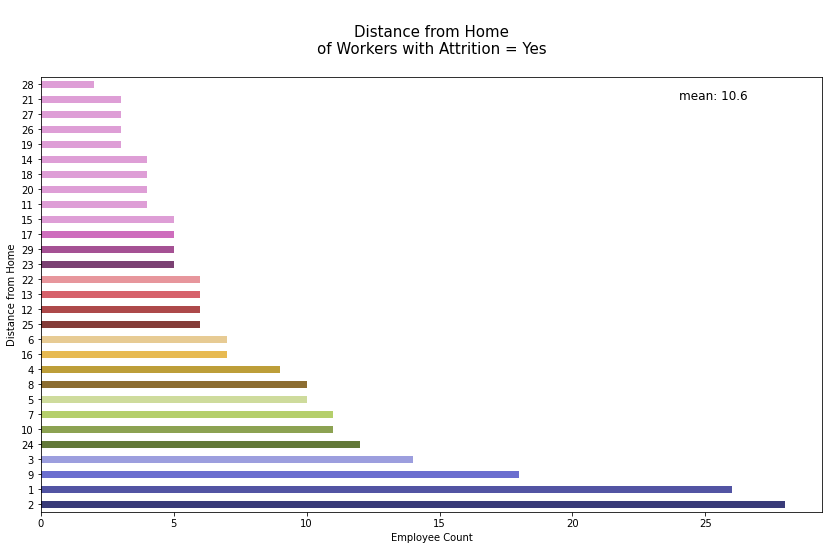

In [163]:
plt.figure(figsize=[14,8])
maskAt['DistanceFromHome'].value_counts().plot(kind='barh',
                                                      color=plt.cm.tab20b(np.arange(len(maskAt['DistanceFromHome']))))
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['DistanceFromHome'].mean()),
             xy=(24,27), size=12)
plt.title('\nDistance from Home\nof Workers with Attrition = Yes\n', size=15)
plt.ylabel('Distance from Home')
plt.xlabel('Employee Count')

Text(0.5, 0, 'Employee Count')

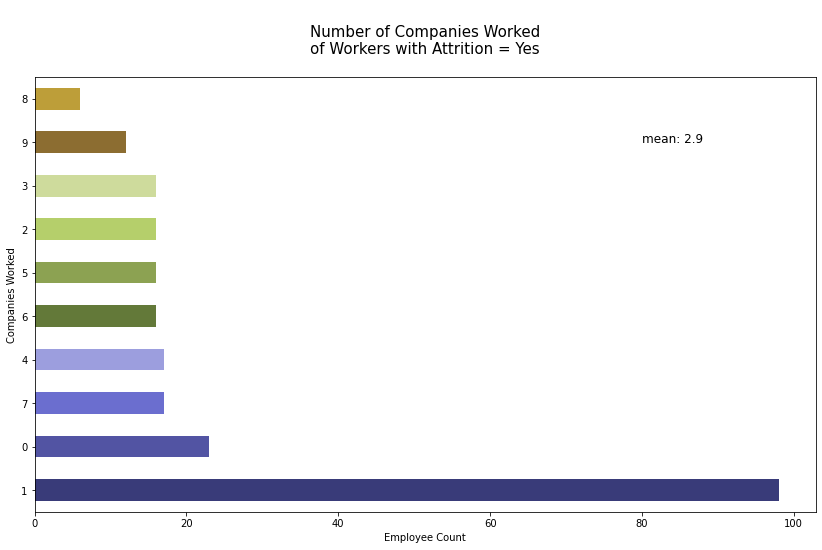

In [166]:
plt.figure(figsize=[14,8])
maskAt['NumCompaniesWorked'].value_counts().plot(kind='barh',
                                                      color=plt.cm.tab20b(np.arange(len(maskAt['NumCompaniesWorked']))))
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['NumCompaniesWorked'].mean()),
             xy=(80,8), size=12)
plt.title('\nNumber of Companies Worked\nof Workers with Attrition = Yes\n', size=15)
plt.ylabel('Companies Worked')
plt.xlabel('Employee Count')

Text(0.5, 0, 'Employee Count')

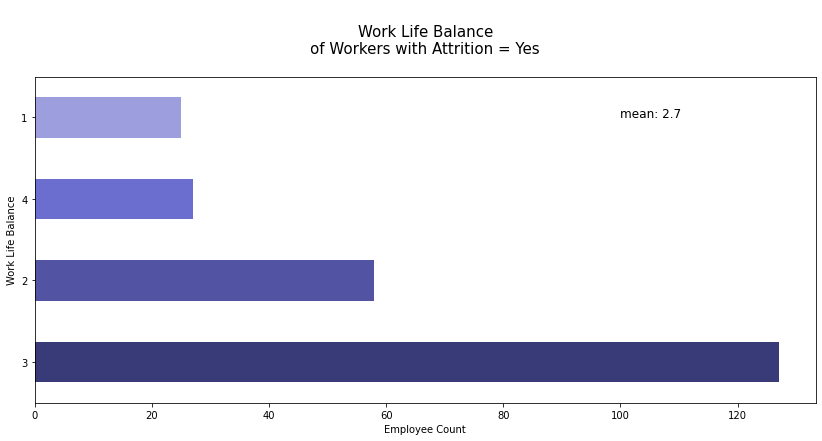

In [133]:
plt.figure(figsize=[14,6])
maskAt['WorkLifeBalance'].value_counts().plot(kind='barh',
                                                      color=plt.cm.tab20b(np.arange(len(maskAt['WorkLifeBalance']))))
                                                  
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['WorkLifeBalance'].mean()),
             xy=(100,3), size=12)
plt.title('\nWork Life Balance\nof Workers with Attrition = Yes\n', size=15)
plt.ylabel('Work Life Balance')
plt.xlabel('Employee Count')

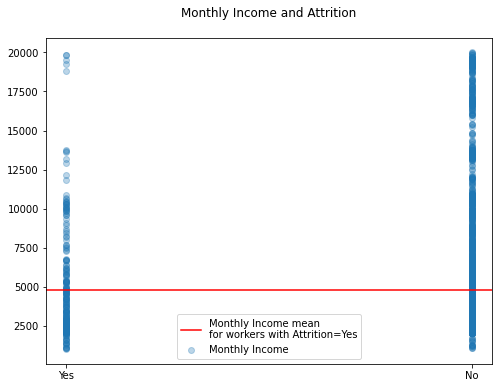

In [156]:
plt.figure(figsize=[8,6])
plt.scatter(df['Attrition'], df['MonthlyIncome'], alpha=0.3, label='Monthly Income')
plt.axhline(maskAt['MonthlyIncome'].mean(), color='red', label='Monthly Income mean\nfor workers with Attrition=Yes')
plt.legend()
plt.title('Monthly Income and Attrition\n')
plt.show()

Text(0.5, 0, 'Monthly Income')

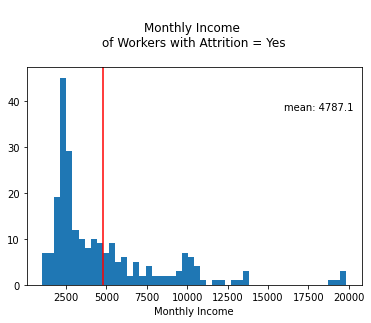

In [238]:
plt.hist(maskAt['MonthlyIncome'], bins=50)                                             
plt.axvline(maskAt['MonthlyIncome'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['MonthlyIncome'].mean()),
             xy=(16000,38))
plt.title('\nMonthly Income \nof Workers with Attrition = Yes\n')
plt.xlabel('Monthly Income')

Text(0.5, 0, 'Employee Count')

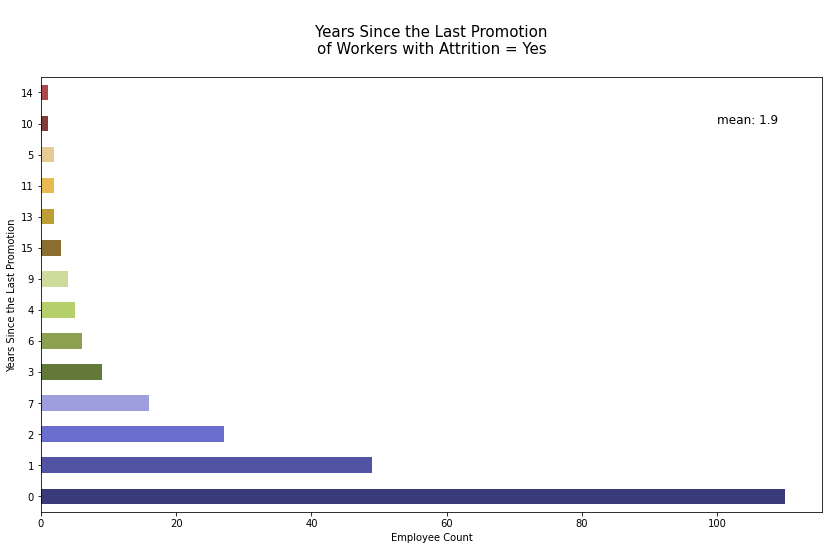

In [139]:
plt.figure(figsize=[14,8])
maskAt['YearsSinceLastPromotion'].value_counts().plot(kind='barh',
                                                      color=plt.cm.tab20b(np.arange(len(maskAt['YearsSinceLastPromotion']))))
                                                  
#plt.axhline(maskAt['EnvironmentSatisfaction'].mean(), color='red', label='overall mean')
plt.annotate('mean: {:.1f}'.format(maskAt['YearsSinceLastPromotion'].mean()),
             xy=(100,12), size=12)
plt.title('\nYears Since the Last Promotion\nof Workers with Attrition = Yes\n', size=15)
plt.ylabel('Years Since the Last Promotion')
plt.xlabel('Employee Count')

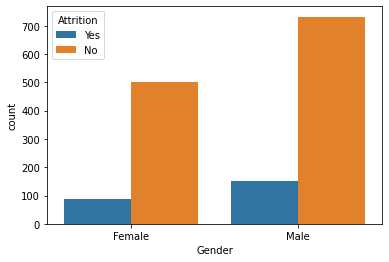

In [5]:
sns.countplot(x='Gender', data=df, hue='Attrition')

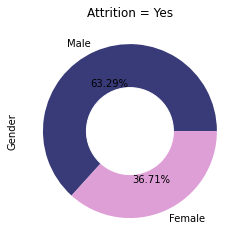

In [61]:
maskAt['Gender'].value_counts().plot(kind='pie',
                                     colormap='tab20b', autopct='%.2f%%')
plt.title('Attrition = Yes')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

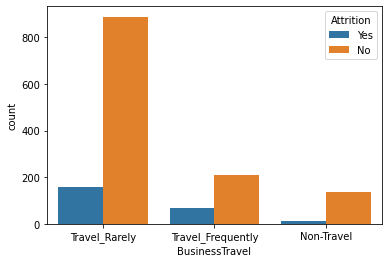

In [ ]:
sns.countplot(x='BusinessTravel', data=df, hue='Attrition')

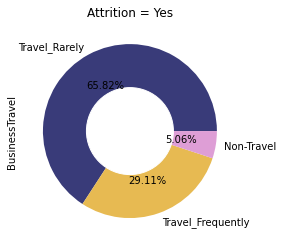

In [60]:
maskAt['BusinessTravel'].value_counts().plot(kind='pie',
                                     colormap='tab20b', autopct='%.2f%%')
plt.title('Attrition = Yes')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

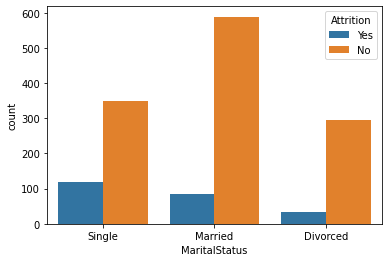

In [ ]:
sns.countplot(x='MaritalStatus', data=df, hue='Attrition')

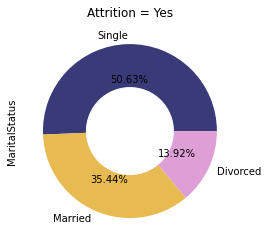

In [59]:
maskAt['MaritalStatus'].value_counts().plot(kind='pie',
                                     colormap='tab20b', autopct='%.2f%%')
plt.title('Attrition = Yes')
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

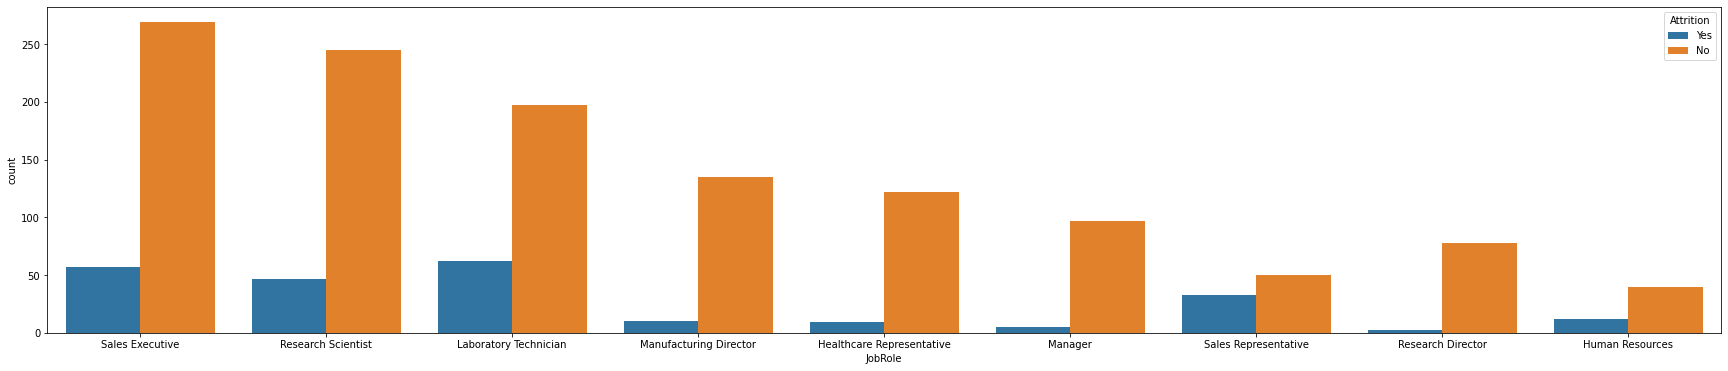

In [ ]:
plt.figure(figsize=[30,6])
sns.countplot(x='JobRole', data=df, hue='Attrition')

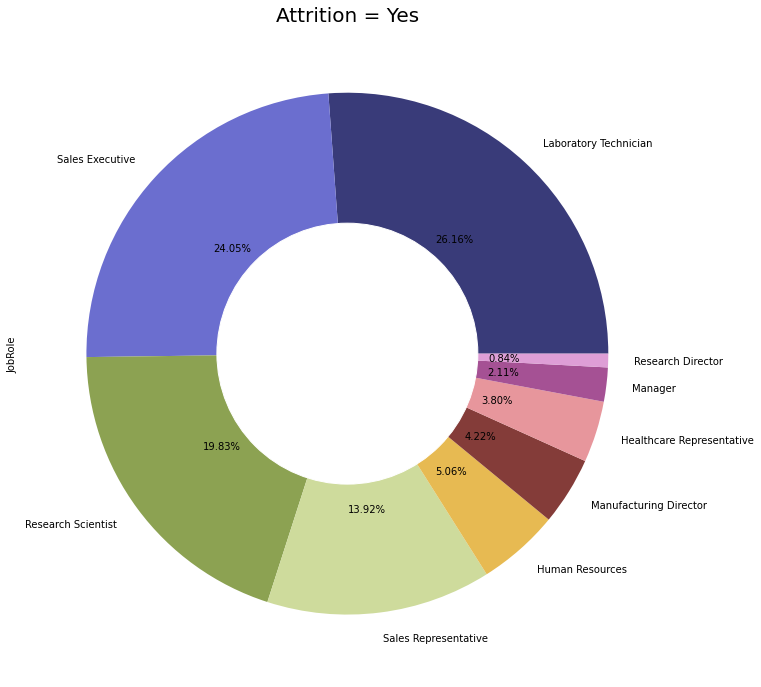

In [32]:
maskAt['JobRole'].value_counts().plot(kind='pie',
                                     colormap='tab20b', figsize=[12,12],
                                      autopct='%.2f%%')
plt.title('Attrition = Yes', size=20)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

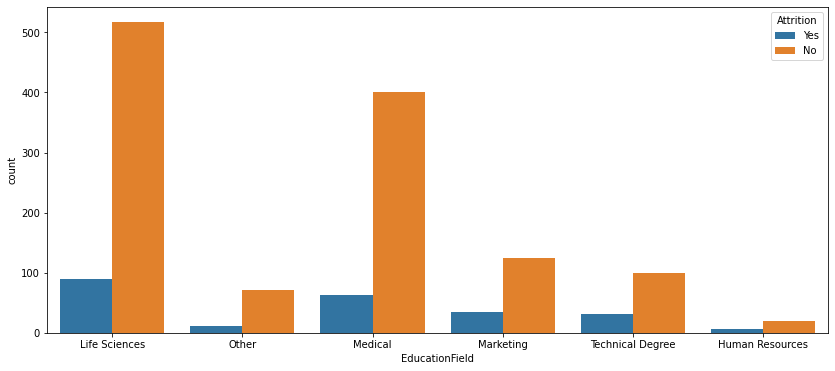

In [ ]:
plt.figure(figsize=[14,6])
sns.countplot(x='EducationField', data=df, hue='Attrition')

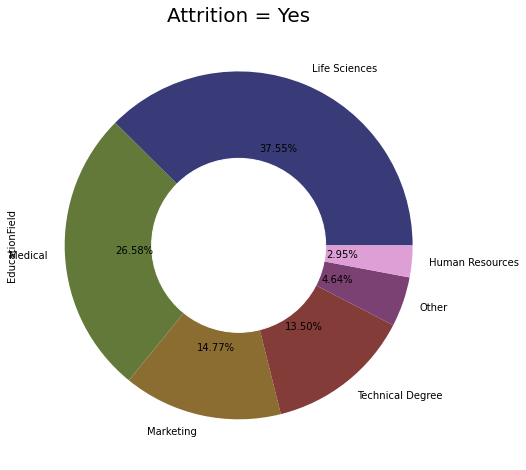

In [34]:
maskAt['EducationField'].value_counts().plot(kind='pie',
                                     colormap='tab20b', figsize=[8,8],
                                      autopct='%.2f%%')
plt.title('Attrition = Yes', size=20)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

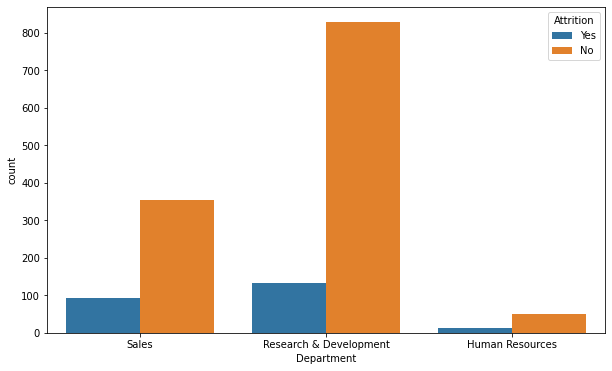

In [ ]:
plt.figure(figsize=[10,6])
sns.countplot(x='Department', data=df, hue='Attrition')

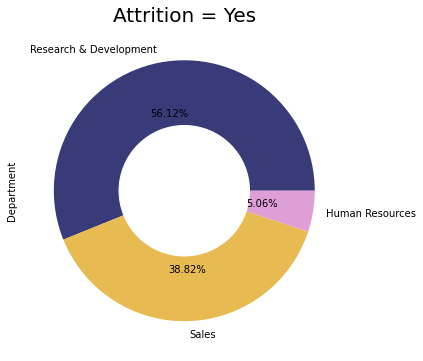

In [38]:
maskAt['Department'].value_counts().plot(kind='pie',
                                     colormap='tab20b', figsize=[6,6],
                                      autopct='%.2f%%')
plt.title('Attrition = Yes', size=20)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


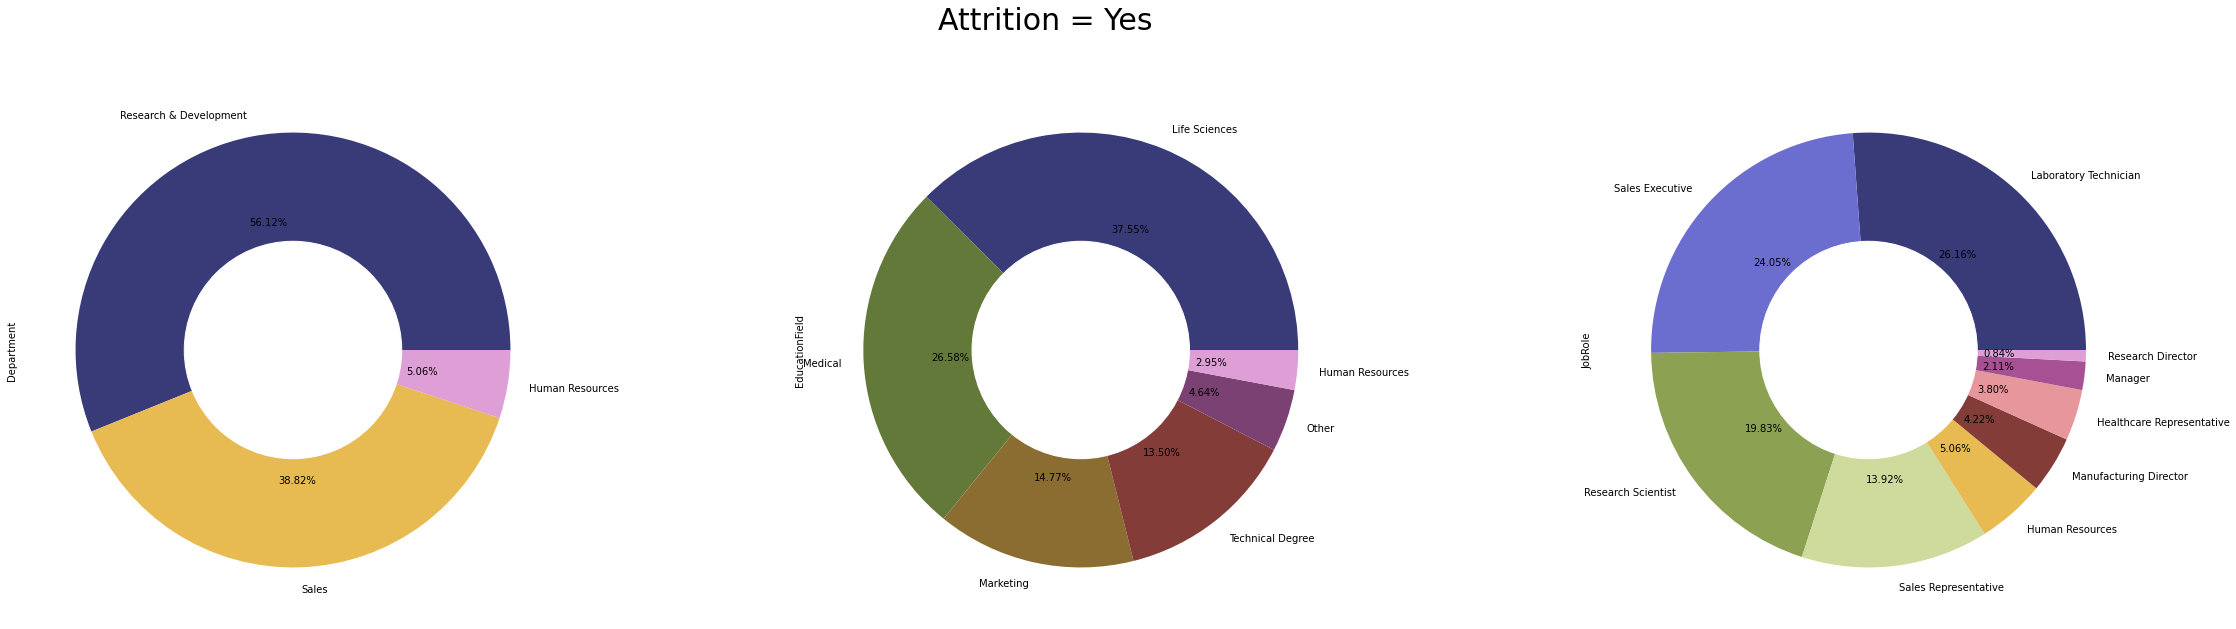

In [94]:
plt.figure(figsize=[40,10])
plt.suptitle('Attrition = Yes', size=30)

plt.subplot(1,3,1)
maskAt['Department'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,2)
maskAt['EducationField'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,3)
maskAt['JobRole'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()

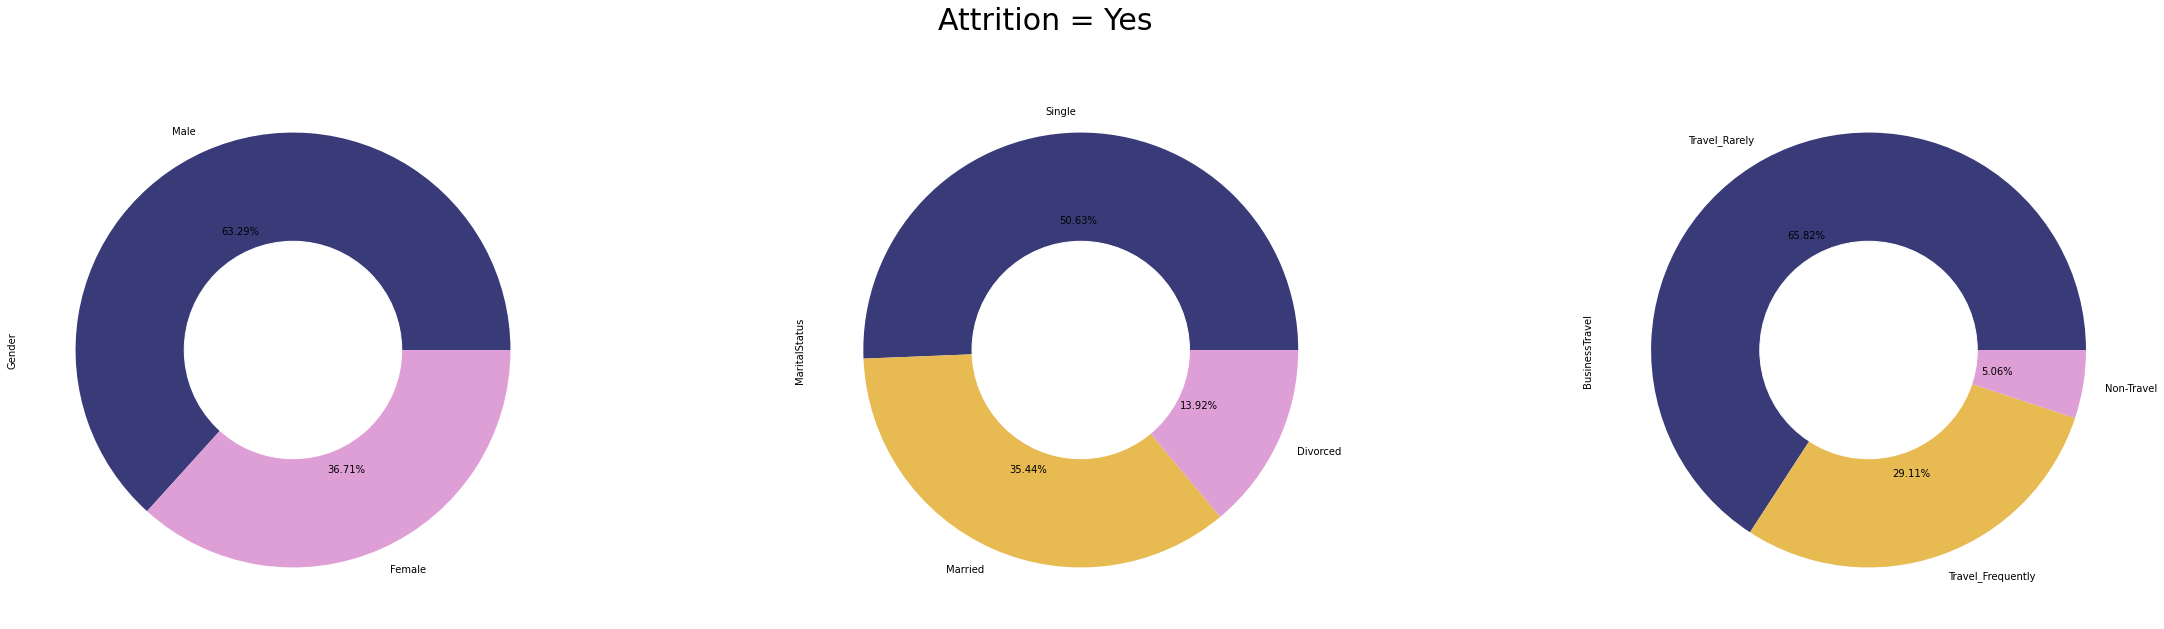

In [167]:
plt.figure(figsize=[40,10])
plt.suptitle('Attrition = Yes', size=30)

plt.subplot(1,3,1)
maskAt['Gender'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,2)
maskAt['MaritalStatus'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.subplot(1,3,3)
maskAt['BusinessTravel'].value_counts().plot(kind='pie',
                                     colormap='tab20b',
                                      autopct='%.2f%%')
# add a circle
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


plt.show()

<h3 align='center'>Decision Tree</h3>
<hr color='purple'> 

In [202]:
df['Attrition'] = df['Attrition'].replace({'Yes' : 1,
                                           'No' : 0})

In [203]:
df2=df.copy()

In [204]:
df2=df2.drop(columns=['Over18','OverTime', 'StockOptionLevel']) #using with and without StockOptionLevel

<h5>Transforming to Numerical</h5>

In [205]:
df3 = pd.get_dummies(df2,columns=['EducationField', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus'])

In [206]:
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,0,1,0


In [211]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale_vars = ['MonthlyIncome','MonthlyRate','NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance',   ]
scaler = MinMaxScaler()

df3[scale_vars] = scaler.fit_transform(df3[scale_vars])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,80,0,8,0,0.000000,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,80,1,10,3,0.666667,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,80,0,7,3,0.666667,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,80,0,8,3,0.666667,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,80,1,6,3,0.666667,2,2,2,2


<h5 align='center'>Decision Tree</h5>

In [207]:
x = df3.drop('Attrition', axis=1).values #input features attributes
y = df3['Attrition'].values #target selector
print('x shape is: {}'.format(np.shape(x))) 
print('y shape is: {}'.format(np.shape(y)))

x shape is: (1470, 51)
y shape is: (1470,)


In [208]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9,
                                                    test_size=0.1, random_state=0)


In [209]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=3, random_state=1) #maxdepth is the tree levels
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [210]:
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df3.drop('Attrition', axis=1).columns,    
    class_names=df3['Attrition'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render('decision_tree.svg', format='svg', directory='output').replace('\\', '/')

#Class 0 == Attrition NO == Blue
#Class 1 == Attrition YES == Levels till orange

'output/decision_tree.svg.svg'

In [197]:
for i, column in enumerate(df3.drop('Attrition', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column],
                       'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try: #the others values
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except: #the first value
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Age:, 0.130
Importance of feature DailyRate:, 0.044
Importance of feature DistanceFromHome:, 0.000
Importance of feature Education:, 0.000
Importance of feature EmployeeCount:, 0.000
Importance of feature EmployeeNumber:, 0.000
Importance of feature EnvironmentSatisfaction:, 0.000
Importance of feature HourlyRate:, 0.064
Importance of feature JobInvolvement:, 0.000
Importance of feature JobLevel:, 0.000
Importance of feature JobSatisfaction:, 0.000
Importance of feature MonthlyIncome:, 0.101
Importance of feature MonthlyRate:, 0.000
Importance of feature NumCompaniesWorked:, 0.000
Importance of feature PercentSalaryHike:, 0.000
Importance of feature PerformanceRating:, 0.000
Importance of feature RelationshipSatisfaction:, 0.000
Importance of feature StandardHours:, 0.000
Importance of feature StockOptionLevel:, 0.209
Importance of feature TotalWorkingYears:, 0.372
Importance of feature TrainingTimesLastYear:, 0.000
Importance of feature WorkLifeBalance:, 0.000
Im

,index,Variable,Feature Importance Score
0,19,TotalWorkingYears,0.371803
1,18,StockOptionLevel,0.209266
2,0,Age,0.129727
3,11,MonthlyIncome,0.100763
4,33,BusinessTravel_Travel_Frequently,0.079627
5,7,HourlyRate,0.064378
6,1,DailyRate,0.044436
7,39,Gender_Male,0.000000
8,31,EducationField_Technical Degree,0.000000
9,32,BusinessTravel_Non-Travel,0.000000


<h4 align='center'>Model Accuracy</h4>

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score


In [213]:
print("Training Accuracy is: ", dt.score(x_train, y_train)) #evaluated the model on the same dataset that it was trained for
print("\n\nTesting Accuracy is: ", dt.score(x_test, y_test)) #evaluate the model for new datas.

Training Accuracy is:  0.8563869992441421


Testing Accuracy is:  0.8095238095238095


<h5>Confusion Matrix</h5>

In [214]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, 
                    vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [215]:
y_prediction = dt.predict(x_train)


In [216]:
confusion_matrix(y_train, y_prediction)


array([[1106,    6],
       [ 184,   27]])

<Figure size 1800x720 with 0 Axes>

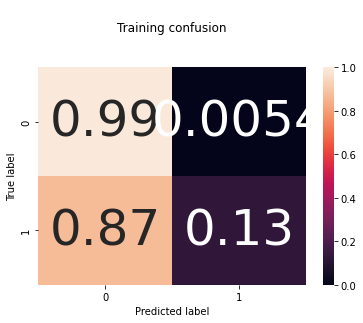

In [220]:
# Plotting Confusion Matrix
plt.figure(figsize=[25,10])
cm = confusion_matrix(y_train, y_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_,
                      title='\nTraining confusion\n\n')

#98% good on predict Attrition = No, and 25% of certain about Attrition = Yes.